### Model Evaluation & Comparison

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load prepared training data
X_train = pd.read_csv('../data/X_train_prepared.csv')
y_train = pd.read_csv('../data/y_train.csv')
X_test = pd.read_csv('../data/X_test_prepared.csv')
y_test = pd.read_csv('../data/y_test.csv')

**Objective:**  
Evaluate all trained models on the test set and compare their performance using metrics and ROC curves to identify the best model.

**Actions:**  
1. Load trained models  
2. Generate predictions on the test set  
3. Compute evaluation metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC  
4. Plot combined ROC curve to visually compare models

In [2]:
# Load Saved Models
import joblib

models = {
    'Logistic Regression': joblib.load(open(r'D:\Bank_Churn_Project\models\logistic_regression.pkl', 'rb')),
    'Random Forest': joblib.load(open(r'D:\Bank_Churn_Project\models\random_forest.pkl', 'rb')),
    'XGBoost': joblib.load(open(r'D:\Bank_Churn_Project\models\xgboost.pkl', 'rb'))
}

print("All models loaded successfully!")


All models loaded successfully!


### Evaluate Models 

In [7]:
metrics = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })


metrics_Customer_Churn = pd.DataFrame(metrics)
metrics_Customer_Churn  # Display comparison table

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.999,0.997455,0.997455,0.997455,0.999492
1,Random Forest,0.999,0.997455,0.997455,0.997455,0.998260
2,XGBoost,0.999,0.997455,0.997455,0.997455,0.997843


#### Evaluation Metrics
- **Accuracy:** Overall correct predictions  
- **Precision:** Correct positive predictions / Total predicted positives  
- **Recall:** Correct positive predictions / Total actual positives  
- **F1 Score:** Harmonic mean of precision and recall  
- **ROC-AUC:** Ability to discriminate between churners and non-churners


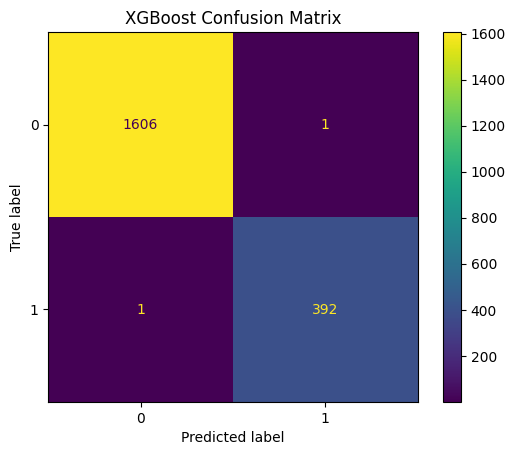

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title(f"{name} Confusion Matrix")
plt.show()


### Plot combined ROC curve

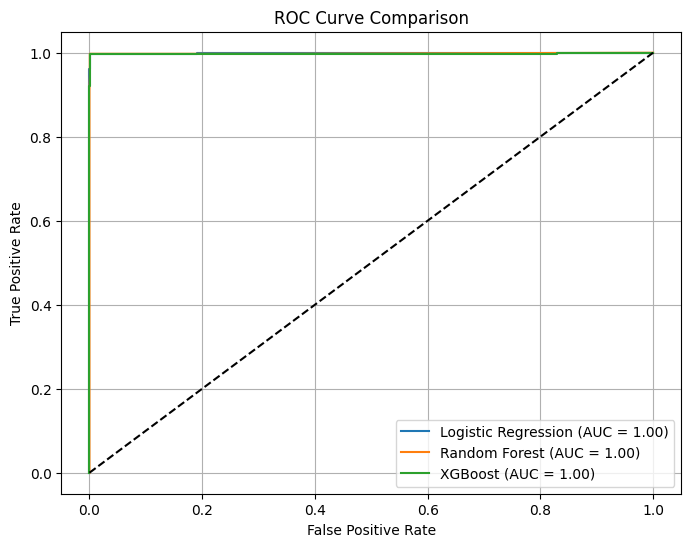

In [10]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

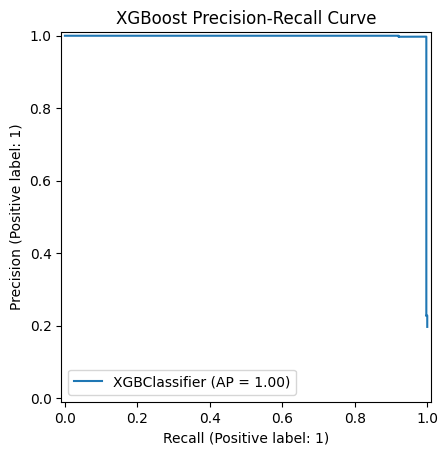

In [11]:
# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title(f"{name} Precision-Recall Curve")
plt.show()

#### Visual Evaluation
- **Confusion Matrix:** Shows true vs predicted classes  
- **ROC Curve:** Shows trade-off between True Positive Rate and False Positive Rate  
- **Precision-Recall Curve:** Important for imbalanced datasets

In [12]:
# Create metrics comparison table
metrics_Customer_Churn = pd.DataFrame(metrics)
metrics_Customer_Churn = metrics_Customer_Churn.sort_values(by='F1-Score', ascending=False)
metrics_Customer_Churn

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.999,0.997455,0.997455,0.997455,0.999492
1,Random Forest,0.999,0.997455,0.997455,0.997455,0.998260
2,XGBoost,0.999,0.997455,0.997455,0.997455,0.997843


#### Model Comparison

- All three models perform extremely well with **F1-Score ~0.997** and **AUC ~0.998–0.999**, showing the features are highly predictive of churn.

- Differences between models are negligible; Logistic Regression is slightly better in AUC and is simpler and more interpretable.

- Recommendation: Use Logistic Regression as the final model for predicting churn, while keeping Random Forest or XGBoost as alternatives if needed.

In [14]:
# Assuming metrics_Customer_Churn is your comparison DataFrame
metrics_Customer_Churn.to_csv("../data/model_comparison_metrics.csv", index=False)
print("Model comparison metrics saved successfully!")

Model comparison metrics saved successfully!
